# Problem set #4 PHY256  

### Problem 1.   Integrating a 1 dimensional equation of motion (ODE) and rescaling

We will use the function *odeint* (or you can use *solve_ivp*) from *scipy.integrate* to integrate an ordinary differential equation (ODE) that we can solve analytically.  This will let us check that it works.  *ivp* means initial value problem.

A dynamical equation decribing a decay rate (the amount of $y$ drops by an amount that depends on the amount of $y$ around and with a rate set by parameter $a$
$$ \frac{dy}{dt} = - ay $$ with initial value $$y(0) = y_0$$
has exponentially decaying solution
$$y(t) = y_0 e^{-at}$$

An example of a system that obeys this equation is the decay of a radioactive element
and $a$ is proportional to the half-life of the element.
Another example might be the decaying voltage in an RC circuit.

For a tutorial on how to use *odeint* or *solve_ivp* see 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

In the example below I show that the integrated solution lies on top of the analytically predicted one.



error  [1.04684432e-09]


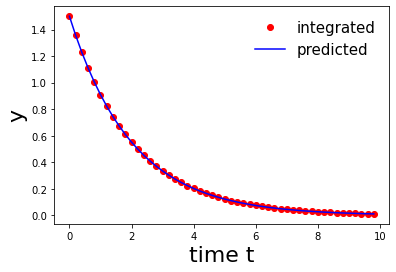

In [1]:
# example, integrating with odeint an exponential decaying function
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#initial condition
y0 = 1.5
a = 0.5  # global variable !!!

# Set up time grid for integration
tmax=10.0;
dt = 0.2;
tt = np.arange(0,tmax,dt);  # the time vector
# this is a list of times.  odeint will return solutions at these times

# our ordinary differential equation
def func(y,t):  # equation for motion! this is dy/dt
    return -a*y

# our analytical solution given initial value y0 and time t 
def ysol_func(y0,t):
    return y0*np.exp(-a*t)

# solve the ordinary differential equation
yy=odeint(func,y0,tt)  # func is our function, y0 is initial condition, 
# tt a time vector
# yy is now a vector yy values computed by integrating the equation
# we will have a y value at each time in the vector yy

# plot the predicted analytical solution on top of the integrated solution
ysol = ysol_func(y0,tt)   # vector of y values predicted
plt.plot(tt,yy,'ro',label="integrated")  # plot the ingegrated thing as points
plt.plot(tt,ysol,'b-',label="predicted")  # plot the analytical solution as a line
plt.xlabel("time t",fontsize=22)  # make nice labels!
plt.ylabel("y",fontsize=22)
plt.legend(loc='best',frameon=False,fontsize=15)  # legend

# how well did the integration do?
print ('error ', yy[-1] - ysol[-1]);  # difference at the end
    

My predicted function lies on top of my integrated function!

error  -2.4226863204893437e-05


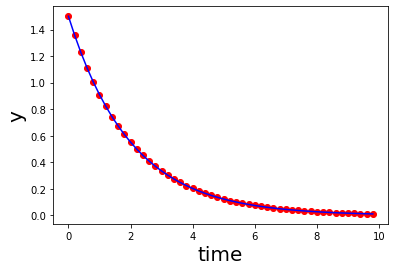

In [2]:
# example using solve_ivp which has completely different formats for everything!
# !#&#$@#$@#

from scipy.integrate import solve_ivp

# our ordinary differential equation
def func2(t,y):  # equation for motion! this is dy/dt, reversing order 
    return -a*y

# our analytical solution given initial value y0 and time t, reversing order 
def ysol_func2(t,y0):
    return y0*np.exp(-a*t)

tmax = np.max(tt)
sol=solve_ivp(func2,[0,tmax],[y0],t_eval=tt,atol=1e-10) #  arguments are not in the same order
# analytical solution
ysol = ysol_func2(tt,y0)
plt.plot(sol.t,sol.y[0],'ro')  # plot the ingegrated thing
plt.plot(tt,ysol,'b-')  # plot the analytical solution
plt.xlabel("time",fontsize=20)
plt.ylabel("y",fontsize=20)

#How well did it do?
print('error ' , ysol[-1]- sol.y[0,-1])


My predicted function lies on top of my integrated function!

### Problem 1

1. Modify one of the example codes above to numerically integrate the ordinary differential equation
$$ \frac{dy}{dt} = 1+y^2 $$   
You will probably need to keep $t < 2$ to keep the solution from going to infinity.

2. Find the analytical solution to this ordinary differential equation.
The integral $\int \frac{dy}{y^2 +1} $ can be computed without much effort using  https://www.wolframalpha.com/   or you can look it up from a list of integrals or you can use variable subsitution to find the integral.  Your analytical solution will depend on 
your initial condition or $y_0 = y(t=0)$.

3.  Compare a numerically integrated solution to one you find analytically.  Plot one on top of the other!  See if you can improve the accuracy of your integration by adjusting the parameter  *rtol* or *atol*.   

``` 
error = rtol * abs(y) + atol
```
*rtol* is a relative tolerance in terms of fraction of $y$.

*atol* is an absolute tolerance.

Here error is a local error so the accumulated error can exceed this.

4. Show that by rescaling the y coordinate and time, any equation in the form
$$ \frac{dz}{d\tau} = a + b z^2$$
with constants nonzero $a,b$ can be rewritten like the previous version.
In other words show that  you can find constants 
$\alpha, \beta$ such that $z = \alpha y$ and $\tau  = \beta t$ giving
$$ \frac{d{ y}}{dt} = 1 +  y^2 $$
Give expressions for $\alpha,\beta $ in terms of $a,b$.



### Why?

When doing numerical work it is a good idea think of ways to test your code.

Comparing a known solution to an integrated one is one way to test the accuracy
of a code.

Often we solve problems in numerical units.  The numerical output is then converted to physical units.   The last part of the problem illustrates this concept.


### Problem 2.  A Qubit class object 

1. Write a python class that stores the state of a qubit. A  state for the qubit looks like 
$$| \psi \rangle = a | 0 \rangle  + b| 1\rangle$$
where $a,b$ are complex numbers and the state is normalized so that $|a|^2 + |b|^2 = 1$.
Here $|a|^2  = a a^*$ where $a^*$ is the complex conjugate of complex number $a$.

The $|0\rangle$ state can be consider a spin up state and the $|1\rangle$ state 
can be considered a spin-down state.

The state can be written in vector form as 
$$ |\psi \rangle =  \begin{pmatrix} a \\ b \end{pmatrix}$$

2. Write a class function that operates on your qubit object with the following unitary transformation
known as the Hadamard gate 
$$ {\bf H} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$

After applying the Hadamard gate on the qubit will put the qubit in a new state
that is described with complex  numbers $a',b'$ such that
$$ \begin{pmatrix} a' \\ b' \end{pmatrix}  
= {\bf H} \begin{pmatrix} a \\ b \end{pmatrix} = 
\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} $$


We can multiply the matrix above to find
$$ a' = \frac{1}{\sqrt{2}}  \left( a + b \right) $$
$$ b' = \frac{1}{\sqrt{2}}  \left( a - b \right) $$


3.  Write a class function that returns the probability that spin up is measured in your qubit. The probability that spin up is measured is $a a^*$.  This class function should not change the state of the qubit (it should not change $a$ or $b$).

4.  Write a class function that simulates measuring the spin.  To do this chose a random number $r \in  [0,1)$. With probability $a a^*$ put the state in the spin up position. In other words if $ r< a a^*$  let  $a' = \frac{a}{|a|}$ and $b'=0$. If $r \ge a a^*$ let  $b' =  \frac{b}{|b|}$ and $a'=0$.



In [3]:
# Some examples using complex numbers in python
# define a complex number
z = 1 + 2j  # this is 1 + 2i

In [4]:
# the real part
np.real(z)

1.0

In [5]:
# the complex part
np.imag(z)

2.0

In [6]:
# the complex conjugate
np.conj(z)

(1-2j)

In [7]:
# convert 1 to a complex number
complex(1)

(1+0j)

In [8]:
# compute the amplitude of a complex number
np.abs(1 + 1j)

1.4142135623730951

In [2]:
# an example of a class!
# a line segment consists of two points on a plane
class segment():
    def __init__(self,x1,y1,x2,y2):  # create the object
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    
    # a function 
    def length_seg(self):   # compute the length of the segment
        dx = self.x1-self.x2
        dy = self.y1-self.y2
        r = np.sqrt(dx*dx + dy*dy)
        return r
    
    # a function that takes an argument theta
    def rotate(self,theta): # rotate the segment clockwise about point (x1,y1)
        dx = self.x1-self.x2
        dy = self.y1-self.y2
        newdx = np.cos(theta)*dx - np.sin(theta)*dy
        newdy = np.sin(theta)*dx + np.cos(theta)*dy
        self.x2 = self.x1 + newdx
        self.y2 = self.y1 + newdy
    
    # plot the segment
    def plt(self):
        #plt.xlim(0,1)
        plt.plot([self.x1,self.x2],[self.y1,self.y2],'k-')  # black line
        plt.plot([self.x1,self.x2],[self.y1,self.y2],'ro',ms=3) # red dots
        plt.plot([self.x1],[self.y1],'ro',ms=6)  # first point is a larger red dot
        
    def __str__(self):  # is called if you want to print the object
        # you need to return a string
        return "segment: ({},{}) ({},{})".format(self.x1,self.y1,\
                                self.x2,self.y2)
    

segment: (0,0.5) (0.5,0)


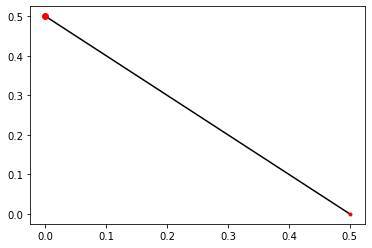

In [10]:
seg1 = segment(0,0.5,0.5,0)  # seg is a segment object 
seg1.plt()  #plot the segment, larger dot is the first point
print(seg1)

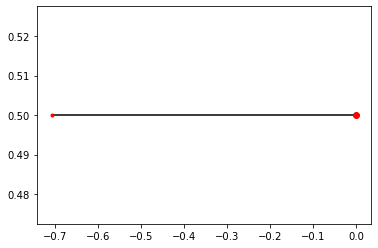

In [11]:
seg1.rotate(np.pi/4)  #rotate counter-clockwise about the first point
seg1.plt()  #plot the segment

In [12]:
print(seg1.length_seg())  # find the length of the segment

0.7071067811865475


###  Problem 3.  Geometric phase on the Bloch sphere

https://en.wikipedia.org/wiki/Pauli_matrices

The Pauli matrices 
$${\boldsymbol \sigma}_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
$${\boldsymbol\sigma}_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$$
$${\boldsymbol\sigma}_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$
An exponentiation of a matrix $\bf A$ is the infinite sum
$$e^{\bf A} = 1 + {\bf A} + \frac{1}{2}{\bf A}^2 + \frac{1}{3!} {\bf A}^3 + ... \frac{1}{i!} {\bf A}^i ...  = \sum_{i=0}^\infty \frac{{\bf A}^i}{i!} $$
An exponentiation of the Pauli matrix ${\boldsymbol \sigma}_x $ is the matrix 
$$R_x(\alpha) = e^{i \alpha {\boldsymbol \sigma}_x }  = {\bf I} + i \alpha {\boldsymbol\sigma}_x  +  \frac{1}{2} (i \alpha  {\boldsymbol \sigma}_x )^2 +... $$
Since $\sigma_x^2 $ is equal to the identity matrix ${\bf I}$ , 
$$ R_x(\alpha) = \cos \alpha \ {\bf I} + i \sin \alpha\ {\boldsymbol\sigma_x }
= \begin{pmatrix} \cos \alpha & i\sin \alpha \\ i\sin \alpha & \cos \alpha \end{pmatrix} $$

The transformation resembles a rotation.   The  rotation depends on angle $\alpha$.
 
Similarly since $\sigma_y^2 =\sigma_z^2 = {\bf I}$ the transformations 
$$ R_y(\alpha) = e^{i\alpha {\boldsymbol\sigma}_y} = \cos \alpha\ {\bf I} + i \sin \alpha\ {\boldsymbol\sigma}_y 
= \begin{pmatrix} \cos \alpha & \sin \alpha \\ -\sin \alpha & \cos \alpha \end{pmatrix} $$
$$ R_z(\alpha) = e^{i\alpha {\boldsymbol\sigma}_z} =\cos \alpha\ {\bf I} + i \sin \alpha\ {\boldsymbol\sigma}_z 
= \begin{pmatrix} e^{i\alpha} & 0 \\0 & e^{-i \alpha} \end{pmatrix} $$




### Problem 3

1.  Add routines to your qubit object that operate on your qubit with these three transformations $R_x,R_y,R_z$.
These transformations are functions of a rotation angle $\alpha$.

2.   Use your qubit object to show that 
$$R_x\left(\frac{\pi }{4} \right)  | 0 \rangle   =  
 \frac{1}{\sqrt{2}} \left( |0\rangle + i |1\rangle \right)$$

3.   Use your qubit object to show that  
$$ R_x\left(-\frac{\pi}{4} \right)  R_y\left(\frac{\pi}{2} \right) 
 R_x\left(\frac{\pi}{4} \right) | 0 \rangle  = i |0 \rangle $$




These three transformations do a loop on the Bloch sphere. However
the final state differs from the initial one by the complex phase $\pi/2$ as $i = e^{i\pi/2} $.

<img  src="bloch.png" style="width:400px">
This shows the path taken on the Bloch sphere.

The qubit described with $|\psi\rangle = a |0\rangle + b|1\rangle$ resides in a three dimensional sphere embedded in four dimensions as
the two complex numbers (each with two-degrees of freedom) are normalized so that 
$|a|^2 + |b|^2 = 1$.

However the Bloch sphere is two dimensional and embeded in three dimensions.  

A position on it can be described with two angles, like latitude and longitude.
To place the full qubit state onto the Bloch sphere a phase is discarded.  This 
is a projection.
The discarded global phase
does not affect measurements of the qubit.  However a series of transformations that take
a point on the Bloch sphere along a loop back to its original point, may not
bring the full state vector (including the global phase) back to its original state.
The phase acquired is sometimes called *geometric phase* and is analogous to 
Berry's phase.